In [ ]:
#First we import and load all basic libraries

from google.colab import drive            #For linking colab to Google Drive
import pandas as pd                       #For dataframe handling
import numpy as np                        #For matrix and list computations
import matplotlib.pyplot as plt
import seaborn as sns                     #For advanced graphs
import scipy.stats as stats     

In [ ]:
drive.mount('mydrive')      #Bridge to Google Drive


Mounted at mydrive


In [ ]:
heart = pd.read_csv ('/content/mydrive/MyDrive/EDEM/heart.csv', sep=',')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
Age = heart.Age.describe()
print(heart.Age.describe())
m_age=Age[1]
sd_age=Age[2]

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


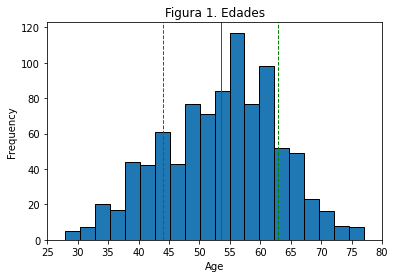

In [ ]:
x=heart['Age']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(25,85, step=5))
plt.title("Figura 1. Edades")
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.axvline(x=m_age, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_age-sd_age, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_age + sd_age, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')

In [ ]:
mytable = heart.groupby(['Sex']).size()
print(mytable)

Sex
F    193
M    725
dtype: int64


In [ ]:
#Excursus to Operators
# Subset year 0
heart_female = heart[heart.Sex == 0]
# Subset year 1
heart_male = heart[heart.Sex == 1]

In [ ]:
# Recoding season into a string variable pain_cat)
heart.loc[(heart['HeartDisease']==0),"HeartDisease_cat"]= "no_enfermo"
heart.loc[(heart['HeartDisease']==1),"HeartDisease_cat"]= "enfermo"
# Quality control
pd.crosstab(heart.HeartDisease, heart.HeartDisease_cat)

HeartDisease_cat,enfermo,no_enfermo
HeartDisease,,
0,0,410
1,508,0


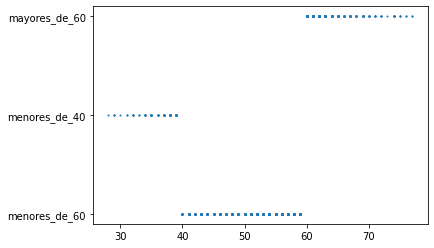

In [ ]:
# Recoding Age into a string variable Age_cat)
heart.loc[(heart['Age']<40),"Age_cat2"]= "menores_de_40"
heart.loc[((heart['Age']>=40) & (heart['Age']<60)),"Age_cat2"]= "menores_de_60"
heart.loc[(heart['Age']>=60),"Age_cat2"]= "mayores_de_60"
##### Quality control?
plt.scatter( heart.Age, heart.Age_cat2, s=1)

(array([178.,   0.,   0.,   0.,   0., 585.,   0.,   0.,   0., 155.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

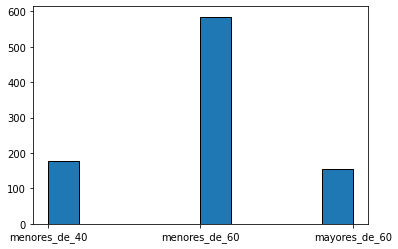

In [ ]:
# Recode the number of rentals in Three Groups
#Compute & store the cutting points
res = heart['Age'].describe()
# Store parameters as numbers
m = res[1]
sd = res[2]
n = res[0]
### Recode 2
heart.loc[ (heart['Age']<(m-sd)) ,"Age_cat2"]= "menores_de_40"
heart.loc[ ((heart['Age']>(m-sd)) & (heart['Age']<(m+sd))) ,"Age_cat2"]= "menores_de_60"
heart.loc[ (heart['Age']>(m+sd)) ,"Age_cat2"]= "mayores_de_60"
heart.Age_cat2.describe()
plt.hist(heart.Age_cat2, edgecolor='black')

(array([172.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <a list of 10 Patch objects>)

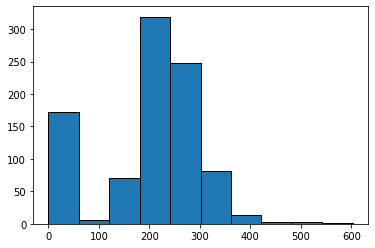

In [ ]:
#Descriptive comparison, Cholesterol and Sex:
#1. Describe the two variables involved in hypothesis
#CHOLESTEROL
heart.Cholesterol.describe()
plt.hist(heart.Cholesterol, edgecolor='black')

Sex
F    193
M    725
dtype: int64
Sex
F    21.023965
M    78.976035
dtype: float64


<BarContainer object of 2 artists>

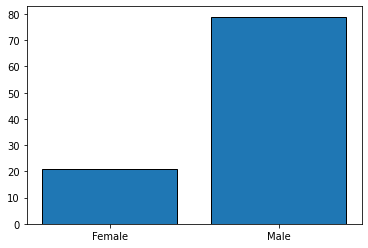

In [ ]:
#SEX
mytablesex = heart.groupby(['Sex']).size()
print(mytablesex)
n=mytablesex.sum()
mytablesex2 = (mytablesex/n)*100
print(mytablesex2)
n=mytablesex.sum()
bar_list = ['Female', 'Male']
plt.bar(bar_list, mytablesex2, edgecolor='black')

In [ ]:
#2. Perform the numeric test: t.test
#Descriptive comparison:
Cholesterol = heart.Cholesterol.describe()
m_cho = Cholesterol[1]
print(m_cho)
#heart.groupby('Cholesterol_cat').Cholesterol.mean()



198.7995642701525


Sex
F    241.196891
M    187.513103
Name: Cholesterol, dtype: float64
F_onewayResult(statistic=38.20338116251452, pvalue=9.58362487285248e-10)


Text(0.5, 1.0, 'Figure 1. Average Cholesterol by Sex.\n')

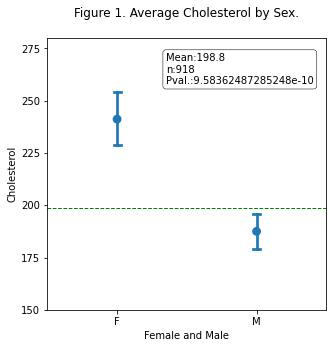

In [ ]:
################################AQUÍ EMPIEZA EL EJERCICIO A ENTREGAR###############################################################################
#ESCOGEMOS LA VARIABLE SEXO Y EL COLESTEROL COMO SUJETO DE ESTUDIO
#Descriptive comparison:
print(heart.groupby('Sex').Cholesterol.mean())

#Statistical comparison:
#Extract the two sub samples and store them in two objects
Cholesterol_female=heart.loc[heart.Sex=='F', "Cholesterol"]
Cholesterol_male=heart.loc[heart.Sex=='M', "Cholesterol"] 

res = stats.f_oneway(Cholesterol_female,Cholesterol_male)
print(res)

#CI meanplot
#Graphic comparison: confidence intervals for the means
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="Sex", y="Cholesterol", data=heart,capsize=0.05, ci=95, join=0, order=['F', 'M'])
ax.set_ylabel('Cholesterol')
plt.yticks(np.arange(150, 280, step=25))
plt.ylim(150,280)
plt.axhline(y=heart.Cholesterol.mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(1.5, 5000, 'Mean: 4504.3''\n''n: 731' '\n' 'F: 40.06''\n' 'Pval.: 0.000', bbox=props)
plt.text(0.35,258,'Mean:198.8''\n''n:918''\n' 'Pval.:9.58362487285248e-10', bbox=props)
plt.xlabel('Female and Male')
plt.title('Figure 1. Average Cholesterol by Sex.''\n')


#OBSERVAMOS QUE EL PVALUE ES MUY CERCANO AL 0 Y POR TANTO RECHAZAMOS LA HIPOSESIS NULA
#PODEMOS DECIR PUES QUE EL COLESTEROL NO DIFIERE CON LA VARIABLE SEXO


ChestPainType
ASY    54.959677
ATA    49.242775
NAP    53.310345
TA     54.826087
Name: Age, dtype: float64
F_onewayResult(statistic=16.86834805144362, pvalue=1.136820472395362e-10)


Text(0.5, 1.0, 'Figure 2. Average Age by ChestPainType.\n')

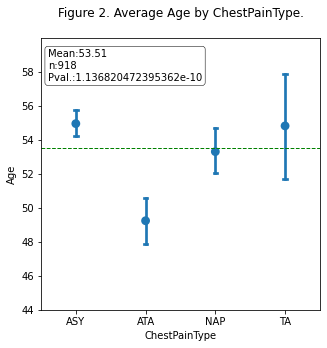

In [ ]:
#ESCOGEMOS LA TIPO DE DOLOR EN EL PECHO Y EL EDAD COMO SUJETO DE ESTUDIO
#Descriptive comparison:
print(heart.groupby('ChestPainType').Age.mean())

#Statistical comparison:
#Extract the two sub samples and store them in two objects
Age_ASY=heart.loc[heart.ChestPainType=='ASY', "Age"]
Age_ATA=heart.loc[heart.ChestPainType=='ATA', "Age"]
Age_NAP=heart.loc[heart.ChestPainType=='NAP', "Age"] 
Age_TA=heart.loc[heart.ChestPainType=='TA', "Age"] 

res = stats.f_oneway(Age_ASY,Age_ATA,Age_NAP,Age_TA)
print(res)

#CI meanplot
#Graphic comparison: confidence intervals for the means
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="ChestPainType", y="Age", data=heart,capsize=0.05, ci=95, join=0, order=['ASY', 'ATA','NAP','TA'])
ax.set_ylabel('Age')
plt.yticks(np.arange(44, 60, step=2))
plt.ylim(44,60)
plt.axhline(y=heart.Age.mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(1.5, 5000, 'Mean: 4504.3''\n''n: 731' '\n' 'F: 40.06''\n' 'Pval.: 0.000', bbox=props)
plt.text(-0.4,57.5,'Mean:53.51''\n''n:918''\n' 'Pval.:1.136820472395362e-10', bbox=props)
plt.xlabel('ChestPainType')
plt.title('Figure 2. Average Age by ChestPainType.''\n')

#OBSERVAMOS QUE EL PVALUE ES MUY CERCANO AL 0 Y POR TANTO RECHAZAMOS LA HIPOSESIS NULA
#PODEMOS DECIR PUES QUE EL TIPO DE DOLOR EN EL PECHO NO DIFIERE CON LA VARIABLE EDAD